DATA MINING & ANALYTICS (2022)

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [1]:
NAME = "Reuel Yang"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully.**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments).
    - This can typically look like taking in another argument `random_state = 42` when applicable.
- The points allotted per question is listed.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers themselves.
- If a question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out!
- You can delete the `raise NotImplementedError()` when you are attempting the question.
- **Submitting the assignment** : Save your work as a PDF (Print -> Save as PDF), download the `.ipynb` file from Colab (Download -> Download as .ipynb), and upload these two files to Gradescope. **Run all cells before submitting.**
- **MAKE A COPY OF THIS FILE FOR YOURSELF TO EDIT/SAVE.**
- That's about it. Happy coding!

In [2]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

#DOWNLOADING DATASET
!wget -nc http://askoski.berkeley.edu/~zp/yelp_reviewers.csv
# !unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv', delimiter= ',')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

--2023-09-13 17:27:15--  http://askoski.berkeley.edu/~zp/yelp_reviewers.csv
Resolving askoski.berkeley.edu (askoski.berkeley.edu)... 169.229.192.179
Connecting to askoski.berkeley.edu (askoski.berkeley.edu)|169.229.192.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35809479 (34M) [text/csv]
Saving to: ‘yelp_reviewers.csv’

yelp_reviewers.csv  100%[===================>]  34.15M  25.6MB/s    in 1.3s    

2023-09-13 17:27:16 (25.6 MB/s) - ‘yelp_reviewers.csv’ saved [35809479/35809479]

Dataset Downloaded: yelp_reviewers.csv
                q3           q4           q5           q6           q7  \
count  7177.000000  7177.000000  7177.000000  7177.000000  7177.000000   
mean      6.838651     5.281455     4.750871     8.808973     1.539160   
std       7.597977    16.208703    13.866352    19.980443     0.885421   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       3.000000     1.000000     1.000000     2.000000     1.100000   

In [3]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0.0,0.0,0.0,0.0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0.0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. (hint: take a look at `silhouette_score`).


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters. The preferred approach for this lab is to treat the empty clusters as “singletons”, leaving them empty with single point placeholders (so no need to drop anything for the purposes of the lab).


In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q1(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df[['q4','q5','q6']]
  silhouette_scores = []
  for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    label_checker = np.unique(cluster_labels)
    for label in label_checker:
      if label not in cluster_labels:
        singleton = kmeans.cluster_centers_[label]
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
  best_k = 2 + silhouette_scores.index(max(silhouette_scores))
  return best_k
  raise NotImplementedError()

print(q1(df))

2


What is the best choice of k?

In [ ]:
2

2

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8.

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q7-q10), then replace the missing values with 0. We do this since the missing values from q7-q10 are most commonly because of taking the log's of values of 0 from q3-q6.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q2(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df[['q7','q8','q9', 'q10']].copy()
  X.fillna(0, inplace=True)
  silhouette_scores = []
  for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
  best_k = 2 + silhouette_scores.index(max(silhouette_scores))
  return best_k
  raise NotImplementedError()

print(q2(df))

2


What is the best choice of k?

In [ ]:
2

2

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8.

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q11-q13), then drop rows that have missing values.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q3(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df[['q11','q12','q13']].copy()
  X.dropna(inplace=True)
  silhouette_scores = []
  for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
  best_k = 2 + silhouette_scores.index(max(silhouette_scores))
  return best_k
  raise NotImplementedError()

print(q3(df))

8


What is the best choice of k?

In [ ]:
8

8

### Question 4 `(1 point)`
Take the best clustering (i.e., best value of K) from Question 3 and using the same subset of data from q11-q13, list the number of data points in each cluster. Return your answer in dictionary form (i.e. `ans = {0: 100, 1: 200, ...}`).

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an dictionary. Eg : {0:1000,1:500,2:1460}.
def q4(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df[['q11','q12','q13']].copy()
  X.dropna(inplace=True)
  kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
  X['Clusters'] = cluster_labels
  cluster_amounts = X['Clusters'].value_counts()
  return cluster_amounts.to_dict()
  raise NotImplementedError()

In [ ]:
#This is an graded cell, do not edit
print(q4(df))

{0: 9831, 6: 5724, 7: 3301, 5: 3216, 4: 3037, 1: 2140, 2: 1632, 3: 1228}


### Question 5 `(1 point)`
Consider the best clustering from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless, etc.)?  If so, print the center of that cluster.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a list. Eg : [10, 30, 54].
def q5(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  best_k = 8
  X = df[['q11','q12','q13']].copy()
  X.dropna(inplace=True)
  kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
  kmeans.fit(X)
  X['Clusters'] = kmeans.labels_
  X['q12-q13'] = X['q12']-X['q13']
  clusters_by_diff = X.groupby('Clusters')['q12-q13'].mean().to_frame()
  funny_but_useless_cluster = clusters_by_diff['q12-q13'].idxmax()
  center = kmeans.cluster_centers_[funny_but_useless_cluster]
  answer = center.tolist()
  return answer
  raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

[ 1.1 98.3  0.6]


### Question 6 `(1 point)`
Consider the best clustering from Question 3. What was the centroid of the cluster that represented relatively uniform strength in all voting categories?

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a centroid in list form. Eg : [10, 10.5, 13].
def q6(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df[['q11', 'q12', 'q13']].copy()
  X.dropna(inplace=True)
  kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
  kmeans.fit(X)
  cluster_centers = []
  for cluster in range(8):
    cluster_center = kmeans.cluster_centers_[cluster]
    cluster_centers.append(cluster_center)
  stds = [np.std(arr) for arr in cluster_centers]
  uniform_cluster = np.argmin(stds)
  center_uniform = kmeans.cluster_centers_[uniform_cluster]
  return center_uniform
  raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(q6(df))

[31.455741   30.37879937 38.1627805 ]


### Question 7 `(1 point)`
Cluster the dataset using $k = 7$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

As before, fill NaN values in q7-q10 with 0, but drop rows that have NaN values from q11-q15.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be a float.
def q7(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  X = df[['q7','q8','q9','q10','q11','q12','q13','q14','q15']].copy()
  X[['q7', 'q8', 'q9', 'q10']] = X[['q7', 'q8', 'q9', 'q10']].fillna(0)
  X = X.dropna(subset=['q11', 'q12', 'q13', 'q14', 'q15'])
  kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X)
  silhouette_avg = silhouette_score(X, labels)
  return silhouette_avg
  raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(q7(df))

0.4757489954135929


### Question 8 `(1 point)`
Cluster the dataset using $k = 7$ and using features q7-q15 (refer to the column descriptions if needed).

What is the average q3 value in each of the clusters? Replace/fill NaN values for q7-q15 as you have done for previous questions.

In [ ]:
#Make sure you return the answer value in this function.
#The return value should be an Array. Eg : [10, 30, 54].
def q8(df):

  # YOUR CODE HERE
  # For KMeans use argument n_init = 10 when applicable.
  Y = df.copy()
  Y[['q7', 'q8', 'q9', 'q10']] = Y[['q7', 'q8', 'q9', 'q10']].fillna(0)
  Y = Y.dropna(subset=['q11', 'q12', 'q13', 'q14', 'q15'])
  X = df[['q7','q8','q9','q10','q11','q12','q13','q14','q15']].copy()
  X[['q7', 'q8', 'q9', 'q10']] = X[['q7', 'q8', 'q9', 'q10']].fillna(0)
  X = X.dropna(subset=['q11', 'q12', 'q13', 'q14', 'q15'])
  kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X)
  Y['Cluster'] = labels
  avg_q3 = Y.groupby('Cluster')['q3'].mean().values
  return avg_q3
  raise NotImplementedError()

In [ ]:
#This is a graded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

[3.8 4.6 4.6 2.5 4.8 1.4 3.6]


### Question 9 `(2 points)`

We will now cluster the dataset using all features in the dataset.

We can drop features with high incidents of `-inf` / `NaN` / blank values. We will also perform some form of normalization on these features so as not to over bias the clustering towards the larger magnitude features.

Let's go ahead and get started.


#### Data Cleansing and Normalization ####
**Check how many null values there are in each column.**

In [ ]:
# YOUR CODE HERE
df.isnull().sum()

user_id        0
q3             0
q4             0
q5             0
q6             0
q7             0
q8         35280
q9         36743
q10        24338
q11        21383
q12        21383
q13        21383
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      14469
q16ac          0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values. Let's see what the impact is of removing the two columns with the most null values.

**Drop the two columns with the most NaN values, and then remove all rows with NaN values remaining.**

In [ ]:
# YOUR CODE HERE
new_df = df.copy()
nulls = new_df.isnull().sum()
sort_nulls = nulls.sort_values(ascending=False)
drop_columns = sort_nulls.head(2).index
new_df = new_df.drop(columns=drop_columns)
new_df = new_df.dropna()

By removing two features, we have effectively doubled the number of rows remaining than if we just removed all rows with a NaN value. That's pretty good.  

Now, let's preprocess categorical variables into dummy variables. (hint: look at `pd.get_dummies`).

In [ ]:
# YOUR CODE HERE
new_df.drop(columns='user_id', inplace=True)
new_df = pd.get_dummies(new_df, columns=['q16s', 'q16t'])

Now, normalize the remaining values.

In [ ]:
# YOUR CODE HERE
columns_to_normalize = new_df.columns.difference(['q16l', 'q16s_experienced', 'q16s_freshman', 'q16t_no', 'q16t_yes'])
for column in columns_to_normalize:
    mean = new_df[column].mean()
    std = new_df[column].std()
    new_df[column] = (new_df[column] - mean) / std

Using the the "sum of squared errors" metric along with the elbow method (make a graph and visually examine for the elbow), what is the best k to use for this dataset? (Hint: look at the `inertia_` attribute for k-means in sklearn).

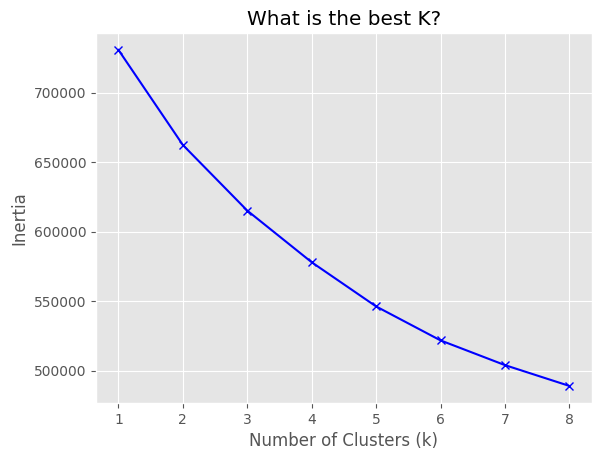

In [ ]:
# The return value should be a graph to visualize the elbow method and the value of k determined from that graph.

# YOUR CODE HERE
# For KMeans use argument n_init = 10 when applicable.
inertia=[]
for k in range(1,9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,9), inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('What is the best K?')
plt.show()

best_k = 2

**Answer: 2**

### Question 10 `(1 points)`
For this question, please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe the question you propose and how clustering can answer that question. Feel free to use additional cells if needed.


**Question: How often was it that a review was funny but useless? Were they very often? Were they rare? Or were they somewhere in between?**

In [ ]:
# YOUR CODE HERE
def q10(df):
  best_k = 8
  X = df[['q11','q12','q13']].copy()
  X.dropna(inplace=True)
  kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
  kmeans.fit(X)
  X['Clusters'] = kmeans.labels_
  X['q12-q13'] = X['q12']-X['q13']
  clusters_by_diff = X.groupby('Clusters')['q12-q13'].mean().to_frame()
  funny_but_useless_cluster = clusters_by_diff['q12-q13'].idxmax()
  cluster_amounts = X['Clusters'].value_counts(ascending=True)
  total_count = len(cluster_amounts)
  first_third = total_count // 3
  last_third = 2 * total_count // 3
  if cluster_amounts.index.get_loc(funny_but_useless_cluster) < first_third:
      result = "Very rare"
  elif cluster_amounts.index.get_loc(funny_but_useless_cluster) < last_third:
      result = "Somewhere in between"
  else:
      result = "Very often"
  return result

print(q10(df))

Very rare


### **Written Answer**

**Answer:** We can determine how often the reviews were funny but useless by comparing the cluster sizes and determining how big or small (compared to the rest of the data) the cluster that represented funny but useless reviews was.

## Bonus question (`2 Points`) - Reviewer overlap:

Now, let's take a look back at what we were doing last week, and use that in junction with what we've learned from above today.

For this bonus question, please:
- Download last week's dataset
- Aggregate cool, funny, and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed.


**You should be returning a dataframe with the following structure in the end:**

Rows: user IDs as indices.

Columns: boolean columns describing if the user ID has a review for each of the labels determined from the K-Means clustering, a boolean column describing if the user ID has a review for all of the given labels, and a column composing of lists of cluster IDs that the given user ID has written reviews for.

In [4]:
# YOUR CODE HERE
# For KMeans use argument n_init = 10 when applicable.
!wget -nc http://askoski.berkeley.edu/~zp/yelp_reviews.csv
new_frame = pd.read_csv('yelp_reviews.csv')

--2023-09-13 17:27:59--  http://askoski.berkeley.edu/~zp/yelp_reviews.csv
Resolving askoski.berkeley.edu (askoski.berkeley.edu)... 169.229.192.179
Connecting to askoski.berkeley.edu (askoski.berkeley.edu)|169.229.192.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376638166 (359M) [text/csv]
Saving to: ‘yelp_reviews.csv’

yelp_reviews.csv    100%[===================>] 359.19M  39.6MB/s    in 9.7s    

2023-09-13 17:28:09 (37.1 MB/s) - ‘yelp_reviews.csv’ saved [376638166/376638166]



In [12]:
agg = new_frame.groupby('business_id')[['cool_votes', 'useful_votes', 'funny_votes']].sum()
k = range(2,9)
for cluster in k:
  kmeans = KMeans(n_clusters=cluster, random_state=42, n_init=10)
  kmeans.fit(agg)
  agg['cluster_label'] = kmeans.labels_
merge_this = agg.reset_index()
merge_this = pd.merge(merge_this, new_frame, on = 'business_id')
bonus_df = merge_this[['business_id', 'user_id', 'cool_votes_x', 'useful_votes_x', 'funny_votes_x', 'cluster_label']]

In [13]:
#This is a graded cell, do not edit
print(bonus_df.head())

              business_id                 user_id  cool_votes_x  \
0  --5jkZ3-nUPZxUvtcbr8Uw  Z3QMIh7ZYf6Q7NbvHJey4Q             4   
1  --5jkZ3-nUPZxUvtcbr8Uw  c8ghzViTRFM44VaccEnEYw             4   
2  --5jkZ3-nUPZxUvtcbr8Uw  5kH4RrEyebBr75ASdxnzSg             4   
3  --5jkZ3-nUPZxUvtcbr8Uw  GRuNDtXKvJgfG69rsqpXIQ             4   
4  --5jkZ3-nUPZxUvtcbr8Uw  tCa2ajxRYbX_RiUX0VPlfA             4   

   useful_votes_x  funny_votes_x  cluster_label  
0               3              3              6  
1               3              3              6  
2               3              3              6  
3               3              3              6  
4               3              3              6  


*ⓒ Prof. Zachary Pardos, 2022*